# Dissociation of polyprotic acids


$$\mathrm{AH}_n \rightarrow \mathrm{AH}_{n-1}^{-} \rightarrow \mathrm{AH}_{n-2}^{2-} \rightarrow ... \rightarrow \mathrm{A}^{n-}$$


equlibrium is characterized with particular $\mathrm pK_a$'s

What will be the population of different species in solution of specific pH, given the dissociation constants ?

For diprotic acid

$$\mathrm{AH}_2 \xrightarrow[-\mathrm H^+]{\mathrm pK_1} \mathrm{AH}^{-} \xrightarrow[-\mathrm H^+]{\mathrm pK_2} \mathrm{A}^{2-}$$


$$\mathrm pK_1 = \mathrm{pH} +\log\frac{[\mathrm{AH}_2]}{[\mathrm{AH}^{-}]} \qquad \mathrm pK_2 = \mathrm{pH} +\log\frac{[\mathrm{AH}^{-}]}{[\mathrm{A}^{2-}]}$$

populations of species can be written as 

$$x_1 = \frac{[\mathrm{AH}_2]}{[\mathrm{AH}_2] + [\mathrm{AH}^{-}] + [\mathrm{A}^{2-}]} \qquad x_2 = \frac{[\mathrm{AH}^{-}]}{[\mathrm{AH}_2] + [\mathrm{AH}^{-}] + [\mathrm{A}^{2-}]} \qquad x_3 = \frac{[\mathrm{A}^{2-}]}{[\mathrm{AH}_2] + [\mathrm{AH}^{-}] + [\mathrm{A}^{2-}]}$$

dissociation constants can be rewritten with the use of populations and also sum of all populations must be 1 (mass balance)

$$10^{\mathrm pK_1  - \mathrm{pH}}=  \frac{x_1}{x_2}$$
$$10^{\mathrm pK_2  - \mathrm{pH}}=  \frac{x_2}{x_3}$$
$$x_1 + x_2 + x_3 = 1$$

We need to solve this system of equations. This can be conveniently rewritten in a matrix form $\mathbf{Ax} = \mathbf{b}$:


$$\begin{pmatrix}
-1 & 10^{\mathrm pK_1  - \mathrm{pH}} & 0\\
0 & -1 & 10^{\mathrm pK_2  - \mathrm{pH}}\\
1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix}=\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}$$




Solution of this system for $\mathbf x$ is 

$$\mathbf x=\begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix}=\begin{pmatrix}
\frac{f_1f_2}{f_1f_2 + f_2 + 1} \\
\frac{f_2}{f_1f_2 + f_2 + 1} \\
\frac{1}{f_1f_2 + f_2 + 1}
\end{pmatrix}$$

where $f_1 = 10^{\mathrm pK_1  - \mathrm{pH}}$ and $f_2 = 10^{\mathrm pK_2  - \mathrm{pH}}$

One can spot a pattern when increasing the number of dissociable protons on the acid and the general solution of this equlibrium for population of species $x_i$ is


$$x_i = \frac{\displaystyle\prod_{k=i}^n f_k}{1 + \displaystyle\sum_{j=1}^n\prod_{k=j}^n f_k}, \qquad f_k=10^{\mathrm pK_k - \mathrm pH}$$

where $n$ is number of $\mathrm pK_a$'s and number of species is therefore $n+1$.

In [9]:
from sympy import symbols, Matrix
from sympy.solvers.solveset import linsolve
import matplotlib.pyplot as plt
import numpy as np

In [10]:
x1, x2, x3, x4, f1, f2, f3 = symbols('x1, x2, x3, x4, f1, f2, f3')

In [11]:
M = Matrix([[-1, f1, 0, 0, 0], [0, -1, f2, 0, 0], [0, 0, -1, f3, 0],  [1, 1, 1, 1, 1]])
M

Matrix([
[-1, f1,  0,  0, 0],
[ 0, -1, f2,  0, 0],
[ 0,  0, -1, f3, 0],
[ 1,  1,  1,  1, 1]])

In [12]:
system = A, b = M[:, :-1], M[:, -1]

linsolve(system, x1, x2, x3, x4)

{(f1*f2*f3/(f3*(f2*(f1 + 1) + 1) + 1), f2*f3/(f3*(f2*(f1 + 1) + 1) + 1), f3/(f3*(f2*(f1 + 1) + 1) + 1), 1/(f3*(f2*(f1 + 1) + 1) + 1))}

In [13]:
def simulate(pkas, pH):
    n = len(pkas)
    _pkas = np.sort(np.asarray(pkas))
    
    fs = 10 ** (_pkas[:, None] - pH[None, :])  # factors for pKas
    
    profiles = np.ones((n+1, pH.shape[0]))
    for i in range(n):
        profiles[i] = fs[i:, :].prod(axis=0, keepdims=False)
        
    profiles /= profiles.sum(axis=0)  # divide each profile by sum of all profiles
    
    return profiles

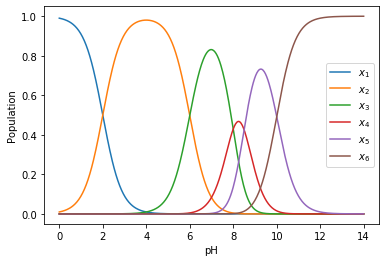

In [14]:
pH = np.linspace(0, 14, 500)
pKas = [2, 6, 8, 8.5, 10]

populations = simulate(pKas, pH)

names = [f'$x_{i + 1}$' for i in range(populations.shape[0])]

for i in range(populations.shape[0]):
    plt.plot(pH, populations[i], label=names[i])
    
plt.legend()
plt.xlabel('pH')
plt.ylabel('Population')
plt.show()

